## SETUP & LOADING


In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np

# Loading the raw data files
train_df = pd.read_csv('../data/train.csv')
stores_df = pd.read_csv('../data/stores.csv')
features_df = pd.read_csv('../data/features.csv')


## MERGING DATAFRAMES

In [ ]:
# Merging the three DataFrames into a single master table
master_df = pd.merge(train_df, stores_df, on='Store', how='left')
master_df = pd.merge(master_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')




: 

##  CLEANING DATA

In [ ]:
# Filling missing markdown values with 0, as NaN means no promotion was active
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    master_df[col] = master_df[col].fillna(0)

# Converting the 'Date' column to a proper datetime format for time-series analysis
master_df['Date'] = pd.to_datetime(master_df['Date'])




: 

# EDA

## SETUP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_style('whitegrid')
print("--- EDA Script Setup Complete ---")

--- EDA Script Setup Complete ---


: 

## HIGH-LEVEL DATA OVERVIEW 

In [ ]:
print("\n--- 2. High-Level Data Overview ---")
print("\nDataFrame Info:")
master_df.info()
print("\nDescriptive Statistics:")
display(master_df.describe())


--- 2. High-Level Data Overview ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296


: 

## TARGET VARIABLE ANALYSIS (Weekly_Sales)

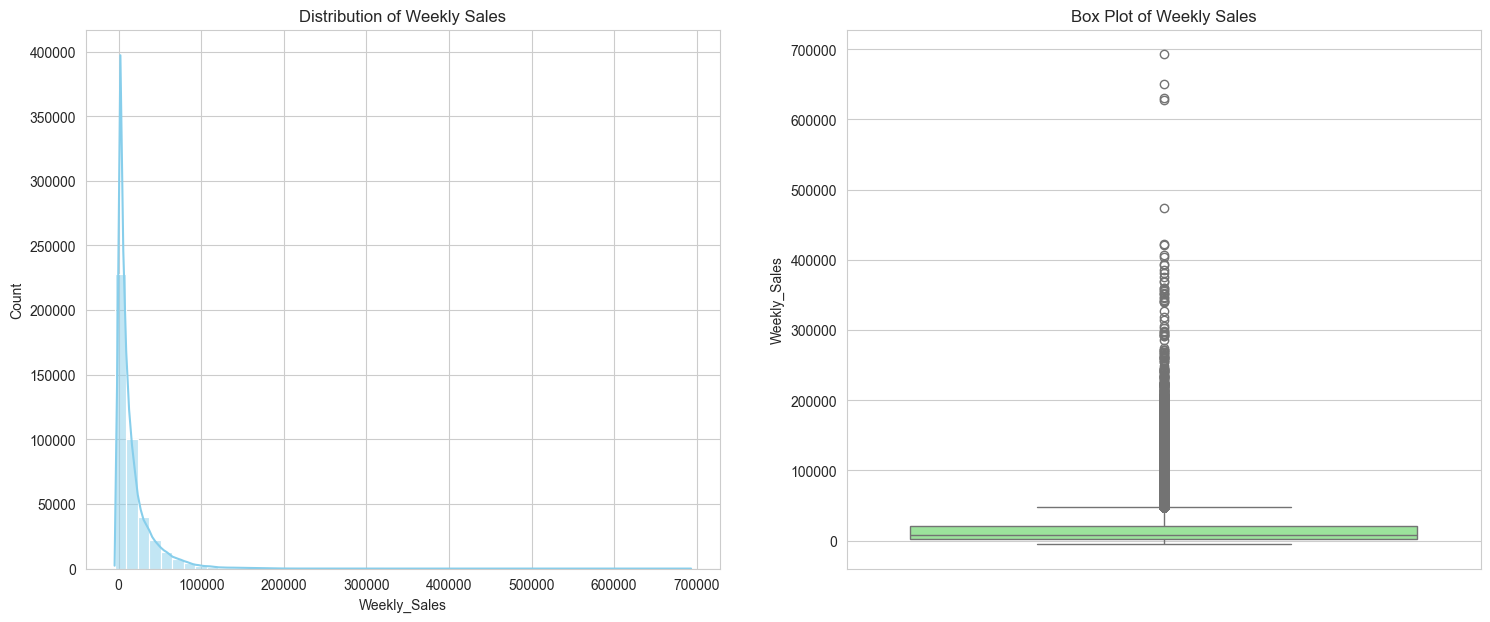

c:\WALMART\walmart\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\WALMART\walmart\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


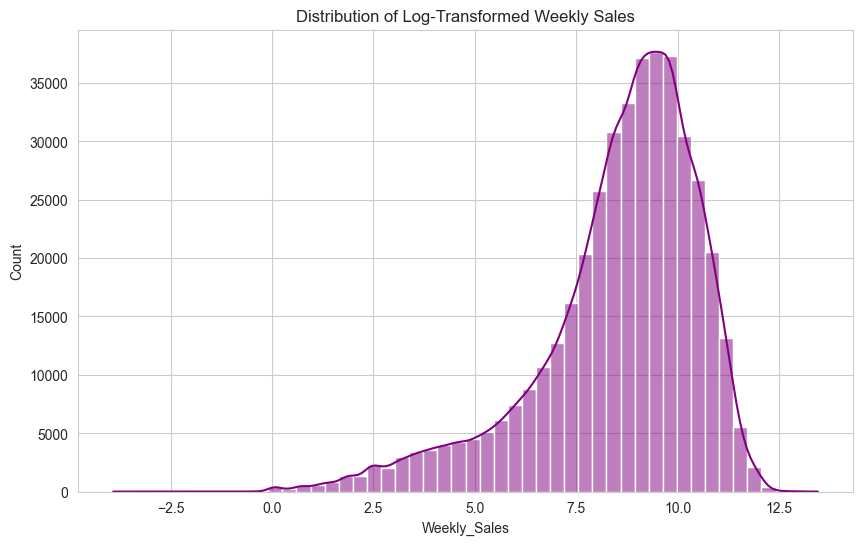

: 

In [ ]:
# Distribution and Outliers
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
sns.histplot(master_df['Weekly_Sales'], bins=50, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribution of Weekly Sales')
sns.boxplot(y=master_df['Weekly_Sales'], ax=axs[1], color='lightgreen')
axs[1].set_title('Box Plot of Weekly Sales')
plt.show()

# Log-Transformed Distribution
log_sales = np.log1p(master_df['Weekly_Sales'])
plt.figure(figsize=(10, 6))
sns.histplot(log_sales, bins=50, kde=True, color='purple')
plt.title('Distribution of Log-Transformed Weekly Sales')
plt.show()


##  TIME-SERIES ANALYSIS

In [ ]:
print("\n--- Time-Series Analysis ---")
master_df['Month'] = master_df['Date'].dt.month
master_df['Year'] = master_df['Date'].dt.year
master_df['WeekOfYear'] = master_df['Date'].dt.isocalendar().week

# Overall Sales Trend
plt.figure(figsize=(15, 7))
master_df.groupby('Date')['Weekly_Sales'].sum().plot(kind='line', color='teal')
plt.title('Total Weekly Sales Over Time')
plt.show()

# Monthly Sales Patterns
fig, axs = plt.subplots(1, 2, figsize=(20, 7))
# Plotting SUM of sales (note: biased by incomplete 2012 data)
master_df.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar', color='skyblue', ax=axs[0])
axs[0].set_title('Total Sales by Month (Sum)')
axs[0].set_ylabel('Total Sales (in billions)')
# Plotting MEAN of sales (more accurate for seasonality)
master_df.groupby('Month')['Weekly_Sales'].mean().plot(kind='bar', color='coral', ax=axs[1])
axs[1].set_title('Average Weekly Sales by Month (Mean)')
axs[1].set_ylabel('Average Weekly Sales')
plt.show()

# Yearly Sales Patterns
fig, axs = plt.subplots(1, 2, figsize=(22, 7))
# Comparing weekly trends year-over-year
sns.lineplot(x='WeekOfYear', y='Weekly_Sales', hue='Year', data=master_df, estimator='mean', errorbar=None, palette='Set2', ax=axs[0])
axs[0].set_title('Average Weekly Sales by Week of Year')
# Comparing total sales volume year-over-year
master_df.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar', color='gold', ax=axs[1])
axs[1].set_title('Total Sales by Year')
axs[1].set_ylabel('Total Sales (in billions)')
plt.show()


--- Time-Series Analysis ---


NameError: name 'master_df' is not defined

: 

## STORE-SPECIFIC ANALYSIS


--- 5. Store-Specific Analysis ---


C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4063933756.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Weekly_Sales', data=master_df, palette='plasma')


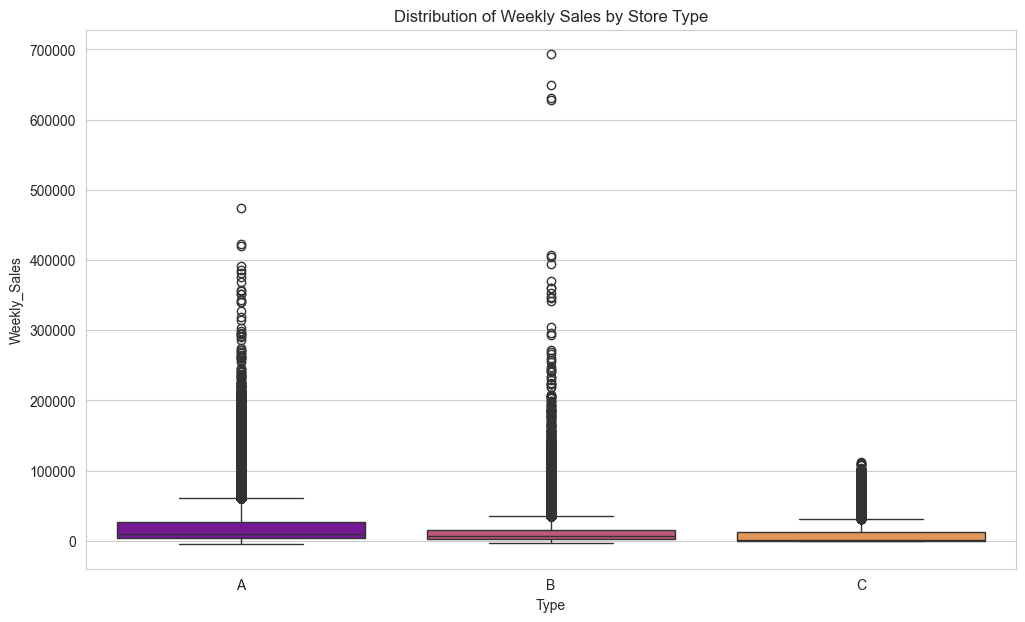

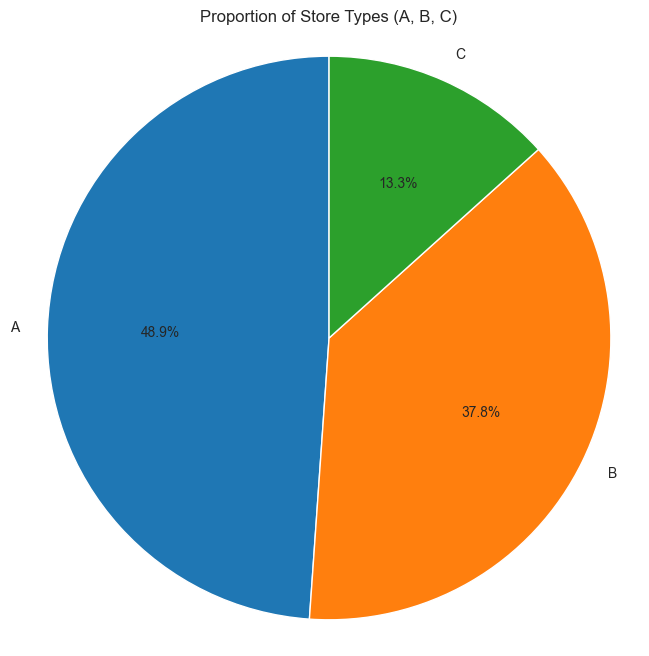

C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4063933756.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_performance.index, y=store_performance.values, palette='rocket')


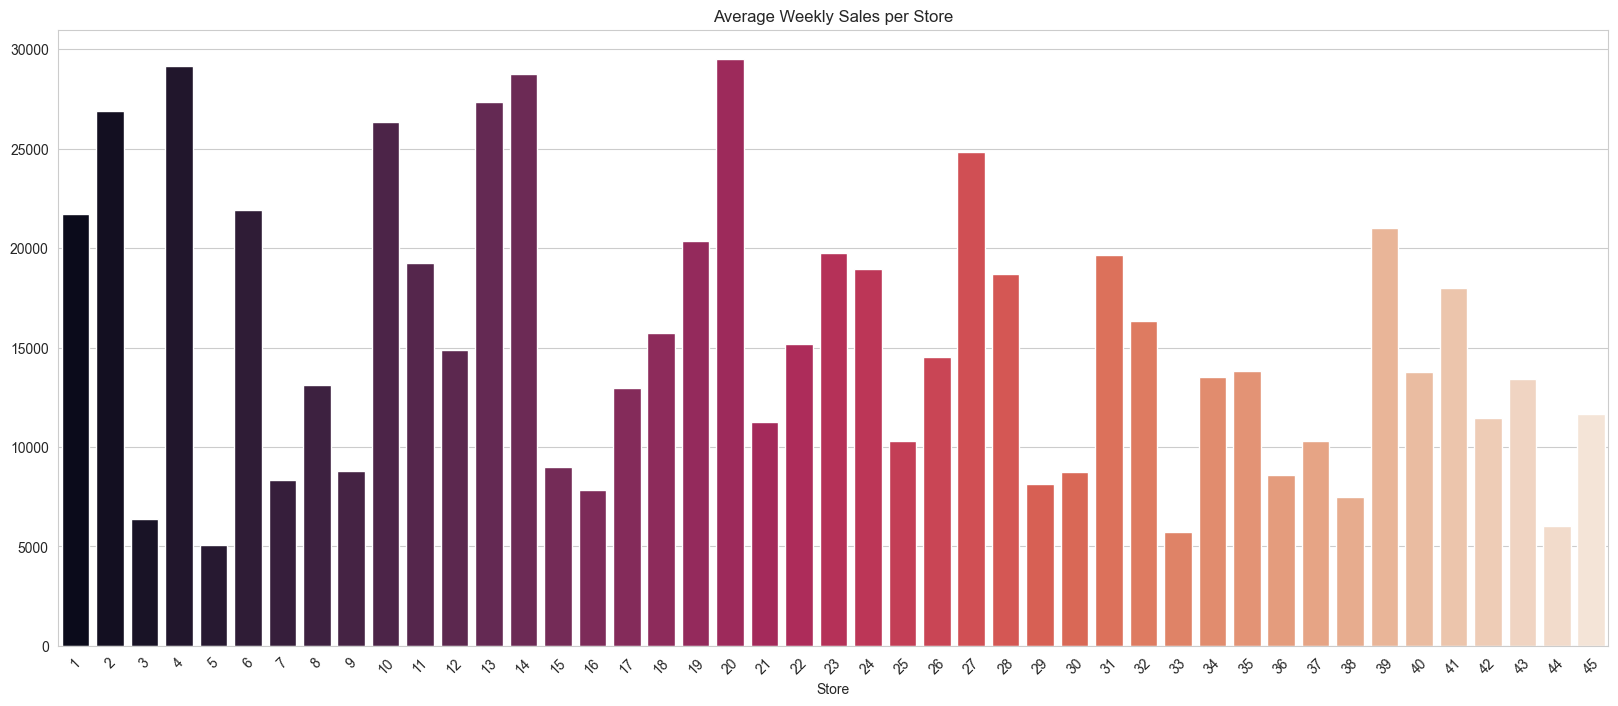

C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4063933756.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_stores.index, y=top_5_stores.values, ax=axs[0], palette='Greens_r')
C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4063933756.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5_stores.index, y=bottom_5_stores.values, ax=axs[1], palette='Reds_r')


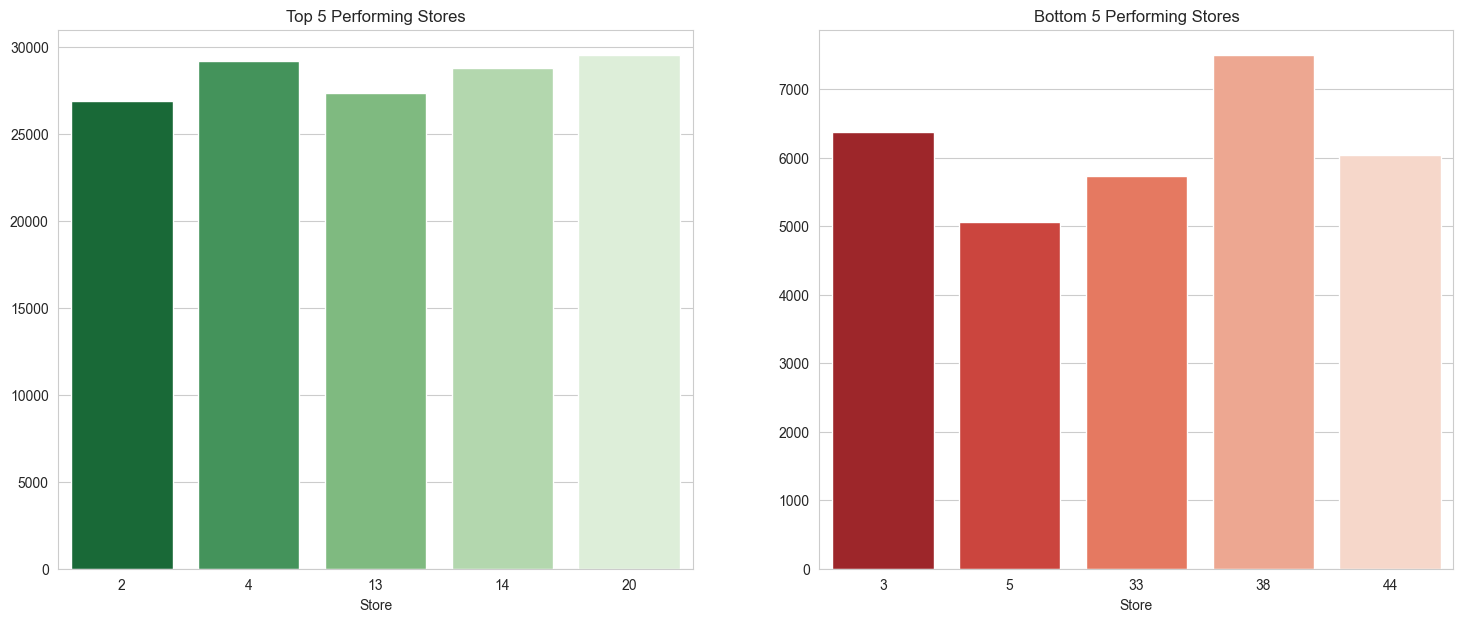

: 

In [ ]:
print("\n--- 5. Store-Specific Analysis ---")
# 5a. Sales by Store Type
plt.figure(figsize=(12, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=master_df, palette='plasma')
plt.title('Distribution of Weekly Sales by Store Type')
plt.show()

# 5b. Proportion of Store Types
store_type_counts = stores_df['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(store_type_counts, labels=store_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Store Types (A, B, C)')
plt.axis('equal')
plt.show()

# 5c. Individual Store Performance
store_performance = master_df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 8))
sns.barplot(x=store_performance.index, y=store_performance.values, palette='rocket')
plt.title('Average Weekly Sales per Store')
plt.xticks(rotation=45)
plt.show()

# 5d. Top and Bottom 5 Stores
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
top_5_stores = store_performance.head(5)
bottom_5_stores = store_performance.tail(5)
sns.barplot(x=top_5_stores.index, y=top_5_stores.values, ax=axs[0], palette='Greens_r')
axs[0].set_title('Top 5 Performing Stores')
sns.barplot(x=bottom_5_stores.index, y=bottom_5_stores.values, ax=axs[1], palette='Reds_r')
axs[1].set_title('Bottom 5 Performing Stores')
plt.show()


## HOLIDAY ANALYSIS 


--- 6. Holiday Analysis ---


C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\1131658243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='IsHoliday', y='Weekly_Sales', data=master_df, palette='cool')


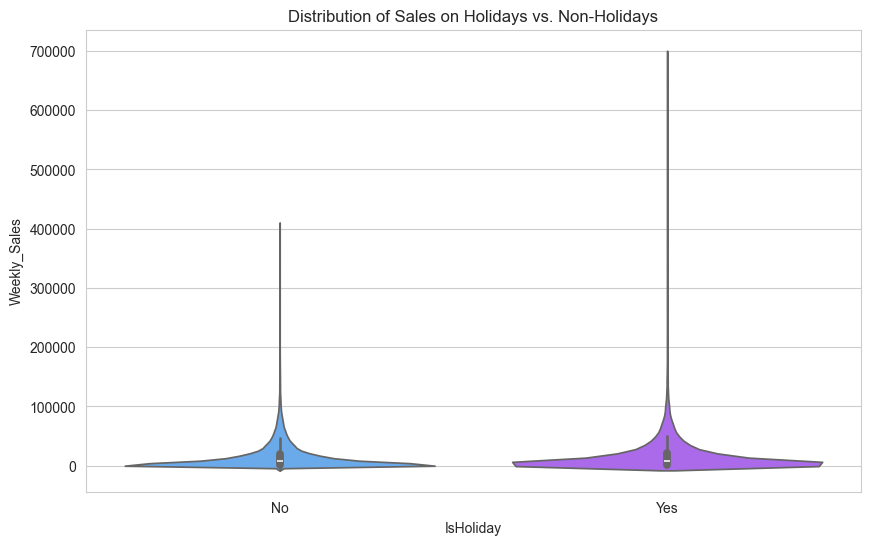

C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\1131658243.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_impact, palette='cool')


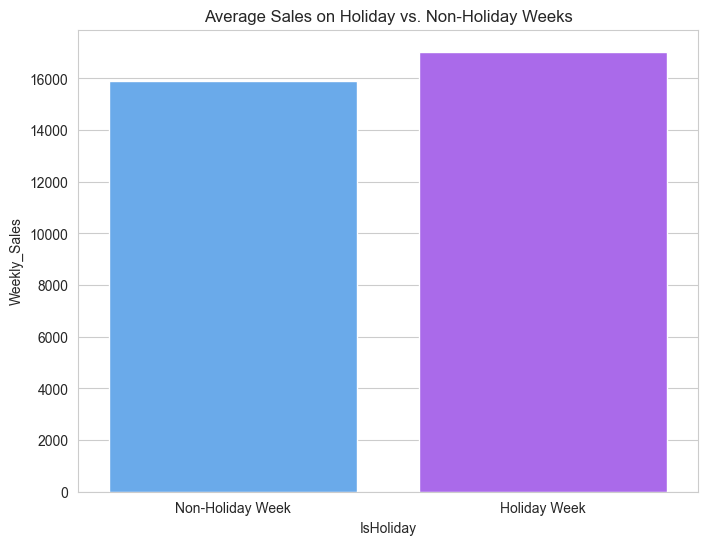

: 

In [ ]:
print("\n--- Holiday Analysis ---")
# Holiday Sales Distribution (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='IsHoliday', y='Weekly_Sales', data=master_df, palette='cool')
plt.title('Distribution of Sales on Holidays vs. Non-Holidays')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Average Holiday Sales (Bar Plot)
holiday_impact = master_df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_impact, palette='cool')
plt.title('Average Sales on Holiday vs. Non-Holiday Weeks')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday Week', 'Holiday Week'])
plt.show()


## EXTERNAL FEATURE ANALYSIS


--- 7. External Feature Analysis ---


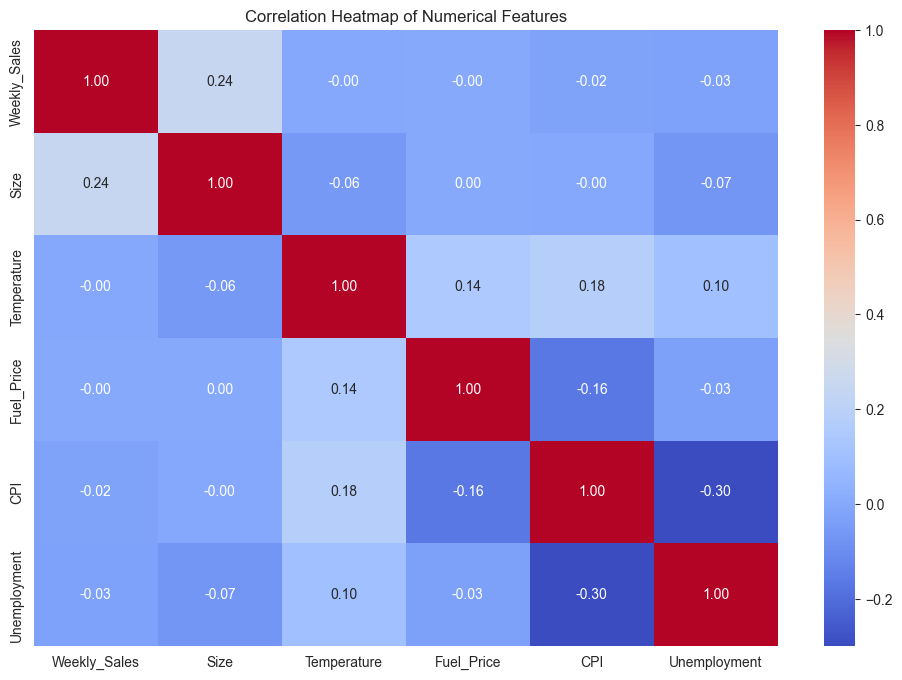

C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4000311995.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_sales_avg = master_df.groupby('Temp_Category')['Weekly_Sales'].mean().reset_index()
C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4000311995.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Temp_Category', y='Weekly_Sales', data=temp_sales_avg, palette='coolwarm', ax=axs[1])


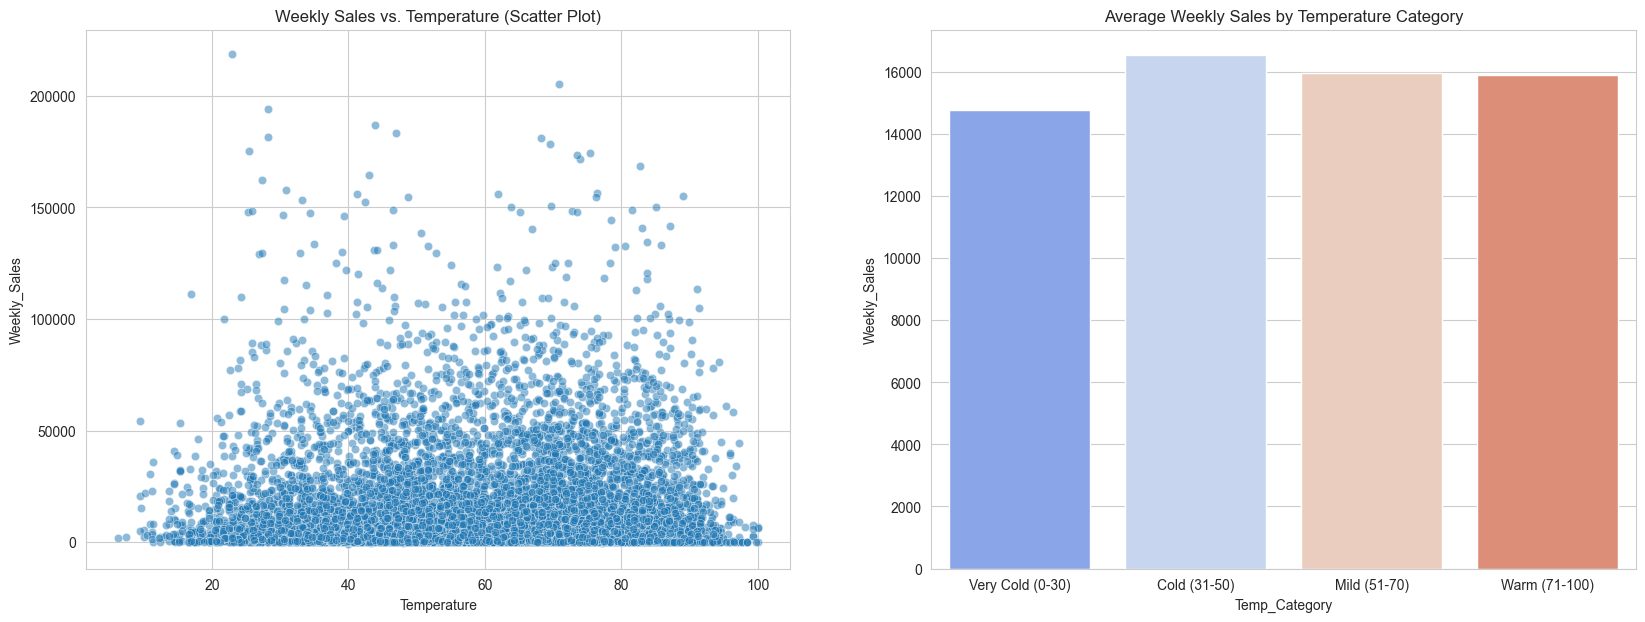

C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4000311995.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpi_sales_avg = master_df.groupby('CPI_Category')['Weekly_Sales'].mean().reset_index()
C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4000311995.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CPI_Category', y='Weekly_Sales', data=cpi_sales_avg, palette='magma', ax=axs[1])


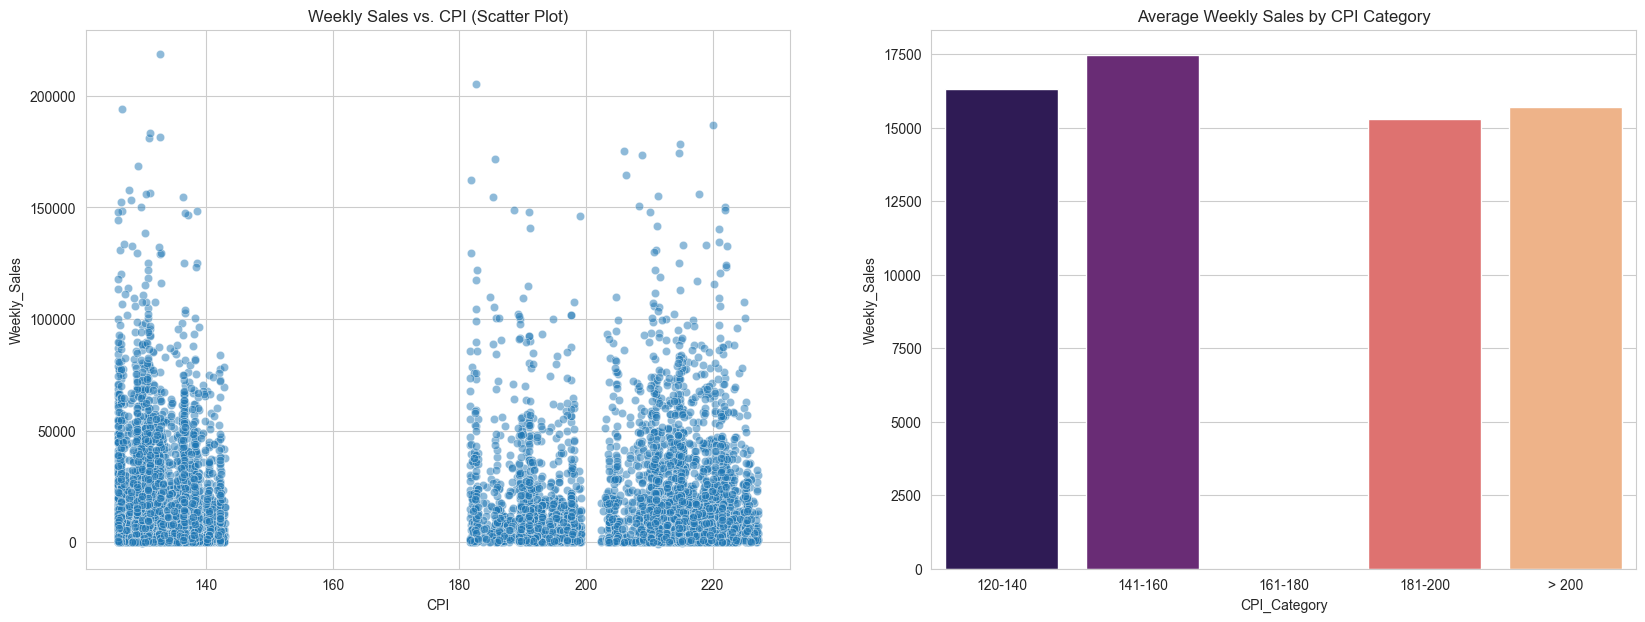

C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4000311995.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuel_sales_avg = master_df.groupby('Fuel_Price_Category')['Weekly_Sales'].mean().reset_index()
C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4000311995.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel_Price_Category', y='Weekly_Sales', data=fuel_sales_avg, palette='crest')


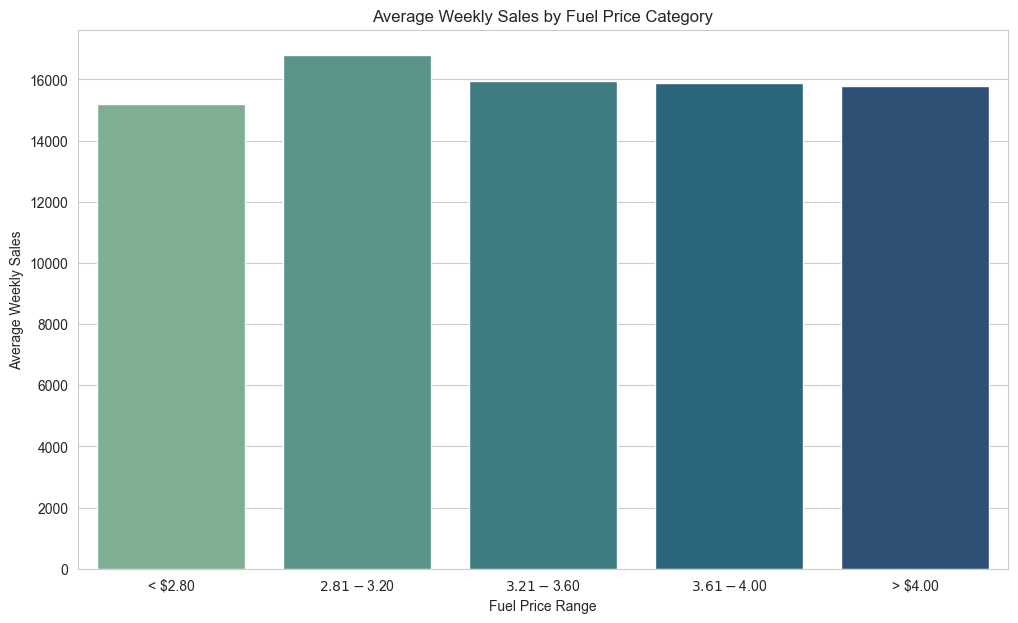

C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4000311995.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unemployment_sales_avg = master_df.groupby('Unemployment_Category')['Weekly_Sales'].mean().reset_index()
C:\Users\SGB\AppData\Local\Temp\ipykernel_6912\4000311995.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unemployment_Category', y='Weekly_Sales', data=unemployment_sales_avg, palette='viridis')


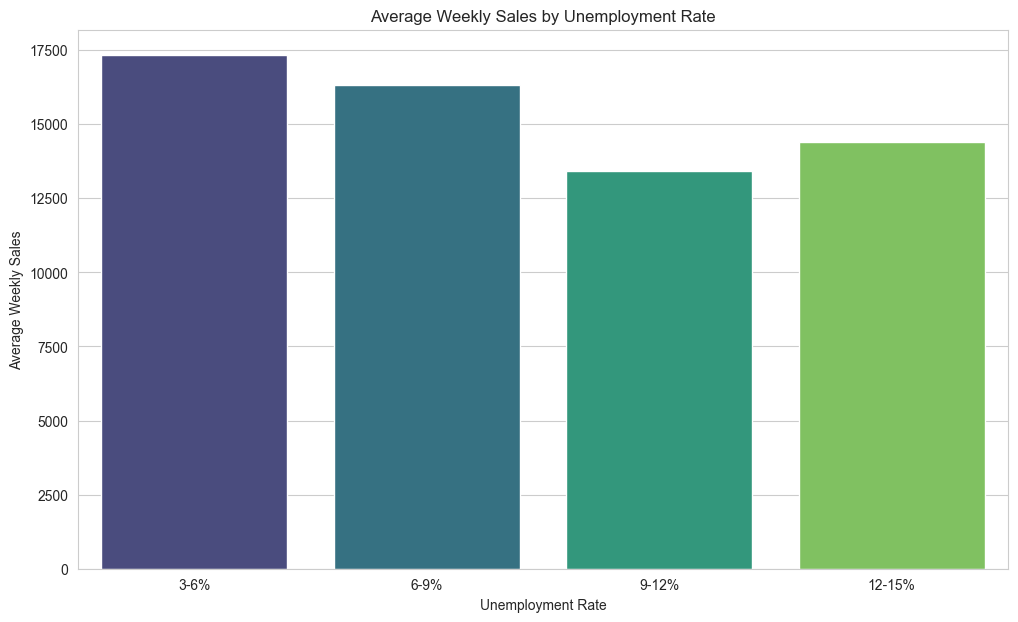

: 

In [ ]:
print("\n--- External Feature Analysis ---")

numerical_cols = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
correlation_matrix = master_df[numerical_cols].corr()

# Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Temperature Analysis
df_sample = master_df.sample(n=10000, random_state=42)
fig, axs = plt.subplots(1, 2, figsize=(20, 7))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df_sample, alpha=0.5, ax=axs[0])
axs[0].set_title('Weekly Sales vs. Temperature (Scatter Plot)')
bins = [0, 30, 50, 70, 100]
labels = ['Very Cold (0-30)', 'Cold (31-50)', 'Mild (51-70)', 'Warm (71-100)']
master_df['Temp_Category'] = pd.cut(master_df['Temperature'], bins=bins, labels=labels)
temp_sales_avg = master_df.groupby('Temp_Category')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Temp_Category', y='Weekly_Sales', data=temp_sales_avg, palette='coolwarm', ax=axs[1])
axs[1].set_title('Average Weekly Sales by Temperature Category')
plt.show()

# CPI Analysis
fig, axs = plt.subplots(1, 2, figsize=(20, 7))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df_sample, alpha=0.5, ax=axs[0])
axs[0].set_title('Weekly Sales vs. CPI (Scatter Plot)')
bins = [120, 140, 160, 180, 200, 230]
labels = ['120-140', '141-160', '161-180', '181-200', '> 200']
master_df['CPI_Category'] = pd.cut(master_df['CPI'], bins=bins, labels=labels)
cpi_sales_avg = master_df.groupby('CPI_Category')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='CPI_Category', y='Weekly_Sales', data=cpi_sales_avg, palette='magma', ax=axs[1])
axs[1].set_title('Average Weekly Sales by CPI Category')
plt.show()

# Fuel Price Analysis
# Defining the fuel price ranges and their labels
bins = [2.4, 2.8, 3.2, 3.6, 4.0, 4.5]
labels = ['< $2.80', '$2.81-$3.20', '$3.21-$3.60', '$3.61-$4.00', '> $4.00']
master_df['Fuel_Price_Category'] = pd.cut(master_df['Fuel_Price'], bins=bins, labels=labels)

# Group by the new category and calculate the MEAN sales for each
fuel_sales_avg = master_df.groupby('Fuel_Price_Category')['Weekly_Sales'].mean().reset_index()

# Creating the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Fuel_Price_Category', y='Weekly_Sales', data=fuel_sales_avg, palette='crest')
plt.title('Average Weekly Sales by Fuel Price Category')
plt.xlabel('Fuel Price Range')
plt.ylabel('Average Weekly Sales')
plt.show()


# Unemployment Analysis
# Defining the unemployment rate ranges and their labels
bins = [3, 6, 9, 12, 15]
labels = ['3-6%', '6-9%', '9-12%', '12-15%']
master_df['Unemployment_Category'] = pd.cut(master_df['Unemployment'], bins=bins, labels=labels)

# Group by the new category and calculate the MEAN sales for each
unemployment_sales_avg = master_df.groupby('Unemployment_Category')['Weekly_Sales'].mean().reset_index()

# Creating the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Unemployment_Category', y='Weekly_Sales', data=unemployment_sales_avg, palette='viridis')
plt.title('Average Weekly Sales by Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Average Weekly Sales')
plt.show()

## ADVANCED TIME-SERIES DIAGNOSTICS 


--- 8. Advanced Time-Series Diagnostics ---


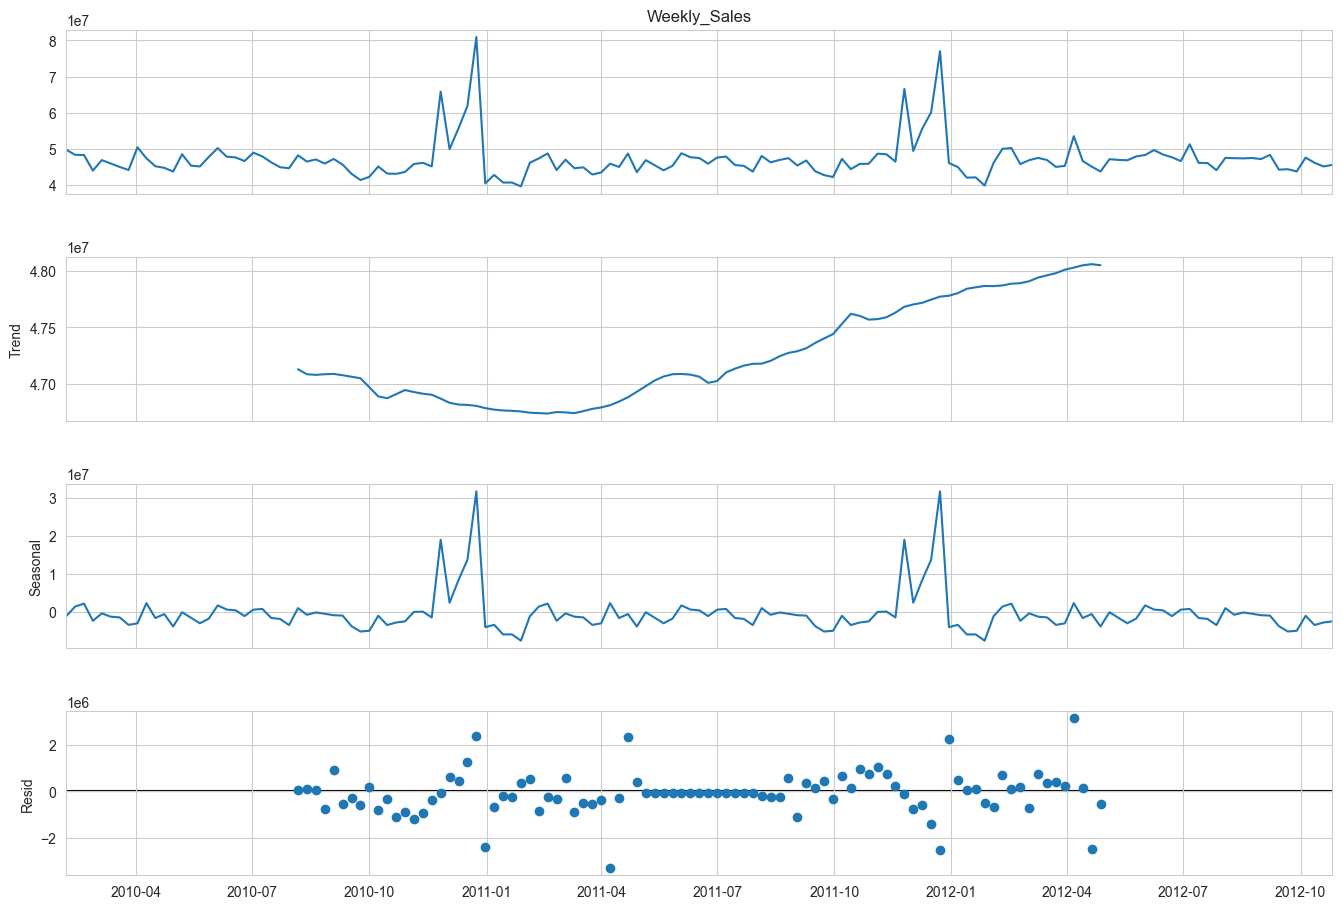

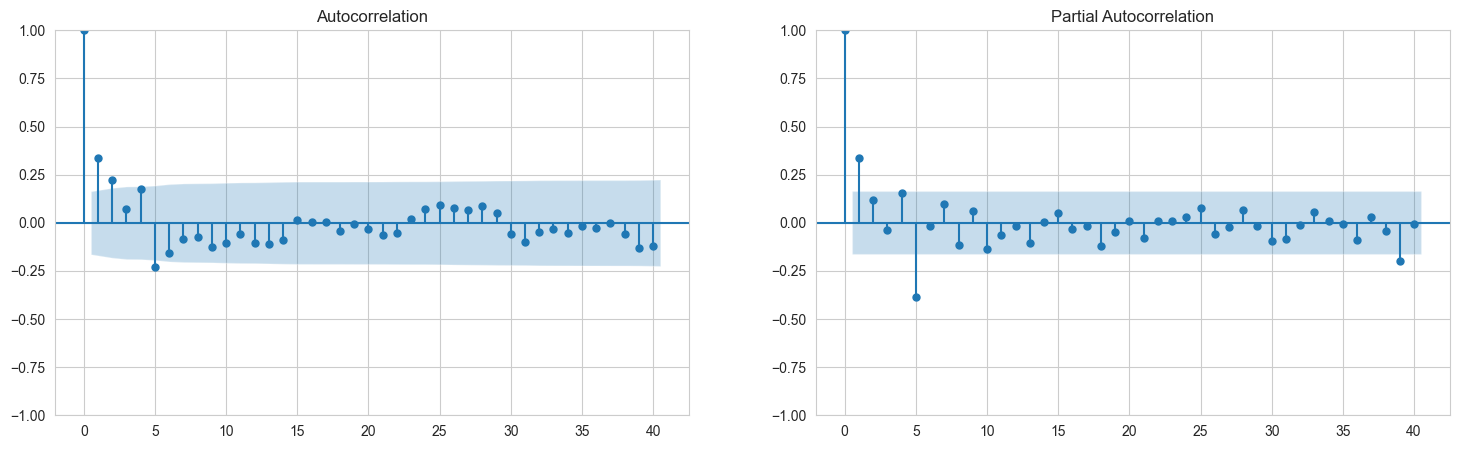


--- Full EDA Script Complete ---


In [ ]:
print("\n--- Advanced Time-Series Diagnostics ---")
# Time Series Decomposition
total_sales = master_df.groupby('Date')['Weekly_Sales'].sum()
decomposition = seasonal_decompose(total_sales, period=52)
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

# Autocorrelation Analysis
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plot_acf(total_sales, lags=40, ax=axs[0])
plot_pacf(total_sales, lags=40, ax=axs[1])
plt.show()

print("\n--- Full EDA Script Complete ---")

## SAVE

In [ ]:
try:
    master_df.to_csv('../data/cleaned_master_data.csv', index=False)
    print("\nSUCCESS: Cleaned master data saved to '../data/cleaned_master_data.csv'")
except Exception as e:
    print(f"\nERROR: Could not save the file. Please ensure the /data directory exists. Error: {e}")


SUCCESS: Cleaned master data saved to '../data/cleaned_master_data.csv'
